**PROCESSAMENTO DAS VARIAVEIS**
---

In [1]:
import pandas as pd

df= pd.read_csv("marketing_investimento.csv")

In [2]:
df.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


In [3]:
# Separando as variáveis independentes (features) e dependente (target)
# x contém as variáveis explicativas (features)
# y contém a variável alvo (target), que é 'aderencia_investimento'

x = df.drop(columns='aderencia_investimento', axis=1)
y = df['aderencia_investimento']

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [5]:
colunas = x.columns

one_hot = make_column_transformer(
        (OneHotEncoder(drop='if_binary'),
         ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']),

remainder='passthrough',  # As colunas restantes serão passadas sem transformação
sparse_threshold=0  # Isso faz com que a matriz codificada seja densa, não esparsa
)

x = one_hot.fit_transform(x)

In [6]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [7]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


In [8]:
from sklearn.preprocessing import LabelEncoder

label_ecoder = LabelEncoder()

y = label_ecoder.fit_transform(y)

> **SEPARACAO DADOS DE TREINO E TESTE**

---

In [32]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify=y, random_state=5)


> **ESCOLHENDO O MODELO**

O que é DummyClassifier?

O DummyClassifier é usado como referência ou baseline, baseando suas previsões em regras simples e sem considerar os recursos de entrada (X) — por exemplo, sempre prevendo a classe mais frequente no conjunto de treinamento (strategy='most_frequent') ou outras estratégias simples. É uma forma de verificar se um modelo mais complexo está, de fato, aprendendo algo útil ou apenas “batendo de bobeira” com base em padrões triviais

> **Dummy**

In [33]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()

dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.6025236593059937

> **Modelo arvore aleatoria**

In [36]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(random_state=5)

arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [ ]:
arvore.predict(x_teste) # cada linha da previsão

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
arvore.score(x_teste,y_teste) 

0.6656151419558359

In [43]:
name_columns =['casado (a)',
 'divorciado (a)',
 'solteiro (a)',
 'fundamental',
 'medio',
 'superior',
 'inadimplencia',
 'fez_emprestimo',
 'idade',
 'saldo',
 'tempo_ult_contato',
 'numero_contatos']


In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


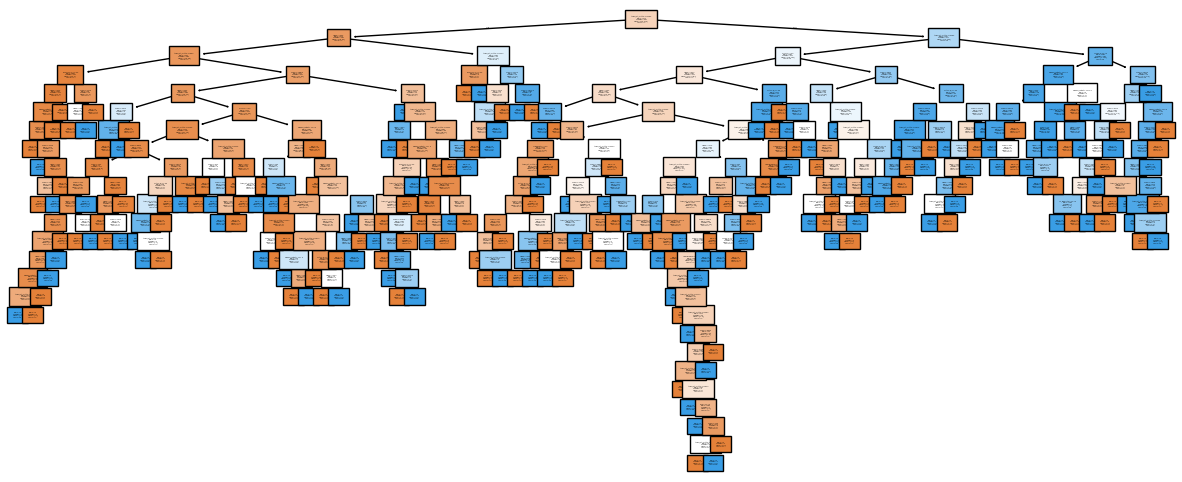

In [45]:
plt.figure(figsize=(15,6))

plot_tree(arvore,filled=True, class_names=['nao', 'sim'], fontsize=1, feature_names=name_columns);

## Interpretação
Esse comportamento — **100 % de acurácia no conjunto de treino** e **desempenho significativamente inferior no teste** — é um forte indício de **overfitting**: o modelo aprendeu profundamente os detalhes (inclusive o ruído) dos dados de treinamento, mas não consegue generalizar para novos dados.

- Overfitting ocorre quando um modelo se ajusta demais aos dados de treinamento, capturando padrões irrelevantes ou ruído que não se repetem em outros conjuntos[^1][^2].
- Um dos sinais mais claros é a discrepância marcante entre o desempenho no treino (alto) e no teste (muito mais baixo).
---


In [46]:
arvore.score(x_treino, y_treino)

1.0